<a href="https://colab.research.google.com/github/jtcarvalho/transfer-learning-mnist/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the MNIST example using tensorflow (recognize numbers from images
)

In [7]:
# Load main libs to use on the transfer-learning example
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [8]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images (0 to 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training size:", x_train.shape, y_train.shape)
print("Test size:", x_test.shape, y_test.shape)


Training size: (60000, 28, 28) (60000, 10)
Test size: (10000, 28, 28) (10000, 10)


In [9]:
# Base model (pre-treined)

from tensorflow.keras.layers import Input

base_model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu')
    ])

# base_model = Sequential([          # Layers sequence
#     Flatten(input_shape=(28,28)),  # Flatten --> to vector
#     Dense(128, activation='relu'), # 128 neurons (Rectified Linear Unit)
#])

# Transfer Learning - Frozen base
for layer in base_model.layers:
    layer.trainable = False

# Final layers for MNIST application
model = Sequential(base_model.layers + [
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0-9) recognize numbers
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7002 - loss: 1.0467 - val_accuracy: 0.8792 - val_loss: 0.4027
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8763 - loss: 0.4003 - val_accuracy: 0.8976 - val_loss: 0.3426
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8935 - loss: 0.3493 - val_accuracy: 0.9086 - val_loss: 0.3075
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9079 - loss: 0.3030 - val_accuracy: 0.9173 - val_loss: 0.2747
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9188 - loss: 0.2670 - val_accuracy: 0.9202 - val_loss: 0.2617


In [14]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy no teste: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - loss: 0.3097
Accuracy no teste: 0.9183


In [15]:
import numpy as np

# Pega a primeira imagem do teste
img = x_test[0].reshape(1,28,28)

# Prediz
pred = model.predict(img)
print("Número previsto:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Número previsto: 7


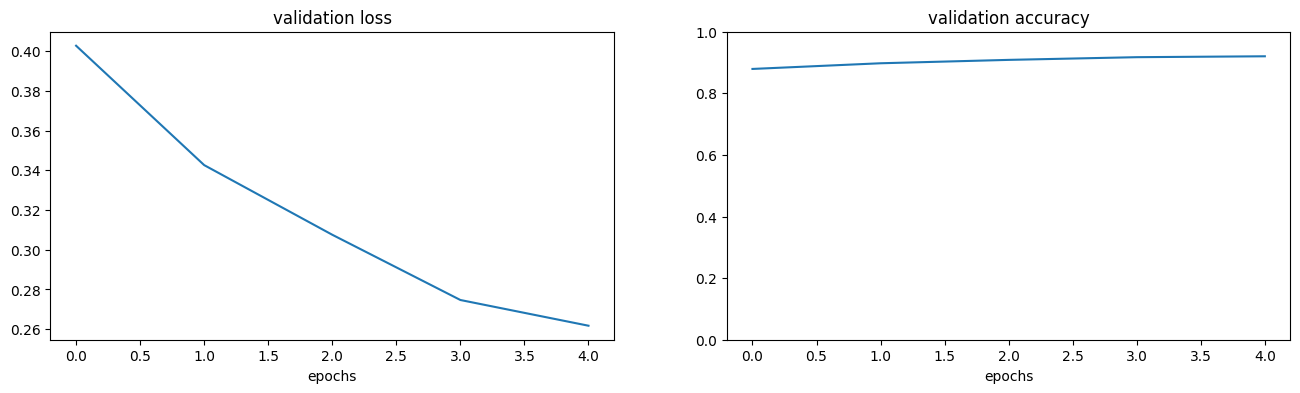

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [4]:
#Training second model
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images (0 to 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 1) Add channel (28,28) -> (28,28,1)
x_train_tl = tf.expand_dims(x_train, axis=-1)
x_test_tl  = tf.expand_dims(x_test, axis=-1)

# 2) Redimension
x_train_tl = tf.image.resize(x_train_tl, (96, 96))
x_test_tl  = tf.image.resize(x_test_tl, (96, 96))

# 3) Convert grayscale -> RGB
x_train_tl = tf.image.grayscale_to_rgb(x_train_tl)
x_test_tl  = tf.image.grayscale_to_rgb(x_test_tl)




base_model = tf.keras.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights="imagenet"
)

# Congela a rede pré-treinada
base_model.trainable = False


model_tl = tf.keras.Sequential([
    tf.keras.Input(shape=(96, 96, 3)),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_tl.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


history2 = model_tl.fit(
    x_train_tl, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 341s 224ms/step - accuracy: 0.9152 - loss: 0.2694 - val_accuracy: 0.9664 - val_loss: 0.0991
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 391s 230ms/step - accuracy: 0.9700 - loss: 0.0880 - val_accuracy: 0.9681 - val_loss: 0.0978
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 351s 234ms/step - accuracy: 0.9773 - loss: 0.0669 - val_accuracy: 0.9724 - val_loss: 0.0856
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 384s 235ms/step - accuracy: 0.9807 - loss: 0.0563 - val_accuracy: 0.9751 - val_loss: 0.0763
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 341s 227ms/step - accuracy: 0.9864 - loss: 0.0410 - val_accuracy: 0.9719 - val_loss: 0.0835


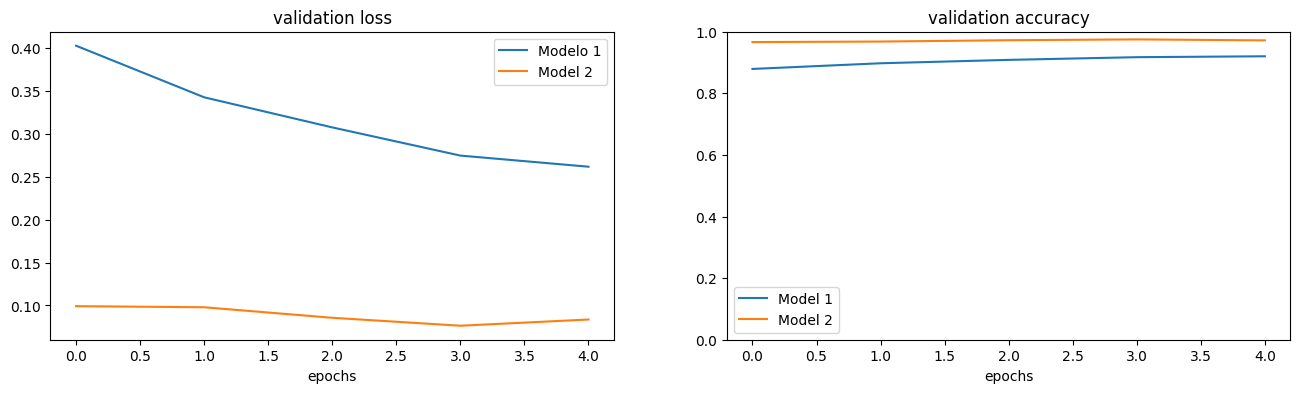

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"], label="Modelo 1")
ax.plot(history2.history["val_loss"], label="Model 2")
ax.set_title("validation loss")
ax.set_xlabel("epochs")
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], label="Model 1")
ax2.plot(history2.history["val_accuracy"], label="Model 2")
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)
ax2.legend()

plt.show()